In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

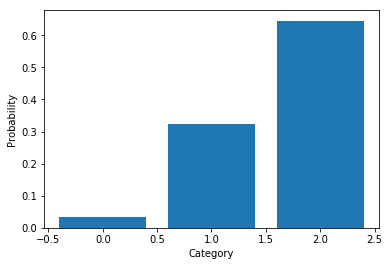

In [5]:
n_cats = 3
cats = np.arange(n_cats)

raw_probs = np.array([1, 10, 20])
probs = raw_probs / sum(raw_probs)
logits = np.log(probs)

def plot_probs():
    plt.bar(cats, probs)
    plt.xlabel("Category")
    plt.ylabel("Probability")
    
plt.figure()
plot_probs()

In [21]:
import torch
from matplotlib.pyplot import *
from torch.nn.functional import softmax

def plot_estimated_probs(samples):
    n_cats = np.max(samples) + 1
    estd_probs, _, _ = hist(samples,
                            bins=np.arange(n_cats + 1),
                            align='left',
                            edgecolor='white',
                            normed=True)
    xlabel("Category")
    ylabel("Estimated probability")
    return estd_probs

def sample(logits):
    noise = np.random.gumbel(size=len(logits))
    sample = np.argmax(logits + noise)
    # sample = np.argmax(logits)
    return sample

samples = [sample(logits) for _ in range(10000)]

figure()
subplot(1, 2, 1)
plot_probs()
subplot(1, 2, 2)
estd_probs = plot_estimated_probs(samples)
tight_layout()

/home/universome/pyvenvs/zoo/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


RuntimeError: softmax(): argument 'input' (position 1) must be Variable, not torch.FloatTensor

In [1]:
import os
from os import path

books = []

for bookname in os.listdir('../data/dostoevsky'):
    book = open(path.join('../data/dostoevsky', bookname), 'r', encoding='utf-8').read().splitlines()
    book = [line for line in book if len(line) > 0]
    books.append(book)
    
data = [s for book in books for s in book]

In [2]:
with open('../data/generated/dostoevsky_joined.txt', 'w', encoding='utf-8') as f:
    for line in data:
        f.write(line + '\n')

In [3]:
%%bash

dostoevsky_joined="../data/generated/dostoevsky_joined.txt"
dostoevsky_sent_split="../data/generated/dostoevsky_sent_split.txt"
mosesdecoder="../ext-libs/mosesdecoder"

$mosesdecoder/scripts/ems/support/split-sentences.perl -l ru \
    < $dostoevsky_joined > $dostoevsky_sent_split

rm $dostoevsky_joined

Sentence Splitter v3
Language: ru


In [4]:
!wc -l ../data/generated/dostoevsky_sent_split.txt

100937 ../data/generated/dostoevsky_sent_split.txt


In [11]:
data = open('../data/generated/dostoevsky_sent_split.txt', 'r', encoding='utf-8').read().splitlines()

Let's tokenize our Dostoevsky dataset

In [13]:
%%bash

mosesdecoder="../ext-libs/mosesdecoder"
generated_data_dir="../data/generated"

threads=6

cat "$generated_data_dir/dostoevsky_sent_split.txt" | \
$mosesdecoder/scripts/tokenizer/normalize-punctuation.perl -l ru | \
$mosesdecoder/scripts/tokenizer/tokenizer.perl -threads $threads -l ru > \
$generated_data_dir/dostoevsky.tok

Tokenizer Version 1.1
Language: ru
Number of threads: 6


In [ ]:
import fasttext

num_threads = 6

model_trg = fasttext.skipgram('../data/generated/dostoevsky.tok',
                              '../trained_models/dostoevsky.tok.cbow',
                              dim=512, min_count=5, silent=0, thread=num_threads)